# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Python Installation**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Linear Regression
Linear Regression is one of the most well-known algorithms in machine learning and statistics. Here, you
will be given a brief overview of how it works and how you can use it in your machine learning problems.
Linear Regression was developed under the field of statistics to study the relationship between input and
output numerical variables but has been borrowed by machine learning to make predictions based on a
linear regression equation.

The mathematical representation of linear regression is a linear equation that combines a specific set of
input data (X) to predict the output value (y) for that set of input values. The linear equation assigns a factor
to each set of input values, which are called the coefficients represented by the Greek letter Beta (β). The
equation mentioned below represents a linear regression model with two sets of input values, $x_{1}$ and $x_{2}$.
Ahead, y represents the output of the model, whereas $β_{0}$ , $β_{1}$ and $β_{2}$ are the coefficients of the linear
equation.


$$ y = β_{0} \;+ \;β_{1} * \;X_{1} + \;β_{2} * \;X_{2}$$

    
In this notebook, you will perform the following steps:

1) [Import Data](#library)


2) [Independent Variables](#x)


3) [Dependent Variable](#y)


4) [Regression Model](#Model)


5) [Mean Square Error](#Error)


6) [Plot Regression Line](#plot)    

<a id='library'></a> 

## Import Data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank"> Scikit-Learn</a> library is used to perform the linear regression and has some of very common datasets to play with.

In [1]:
# Import numpy
import numpy as np

# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Import linear_model and dataset from sklearn
from sklearn import linear_model, datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [11]:
print(f"Diabates shape = {diabetes['data'].shape}")
print(f"Feature names = {diabetes['feature_names']}")
print("Diabetes description:", diabetes['DESCR'], sep=2*'\n')

Diabates shape = (442, 10)
Feature names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Diabetes description:

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol 

<a id='x'></a> 

## Independent Variables

Independent variables are used to predict the value of dependent variable. For illustration purposes, we will use only one feature i.e. only one column as an independent variable.

In [12]:
# Use only one feature as a independent variable
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the independent data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_X_test[:2]

array([[ 0.07786339],
       [-0.03961813]])

<a id='y'></a> 

## Dependent Variable

Dependent/target variable is the outcome which the machine learning model will predict based on the independent variables.
We will split the dependent variable into train and test dataset. Train sample will be used along with the independent dataset X, and the test sample will be compared with predicted values.

In [13]:
# Dependent variable 
diabetes_y = diabetes.target

# Split the dependent data into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
diabetes_y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

<a id='Model'></a> 

## Regression Model 
We will use the `linear_model` function of the scikit-learn library to create a linear regression model.

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

<a id='Error'></a> 

## Mean Squared Error

Mean square error (MSE) is the average of the square of the errors. The larger the number, the larger the error. 

In [15]:
# Mean squared error
print('Mean squared error: %2f' %
      np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2))

Mean squared error: 2548.072399


<a id='plot'></a> 

## Plot Regression Line
We will plot the regression line for our model to get a visual representation.

Variance score: 0.472575


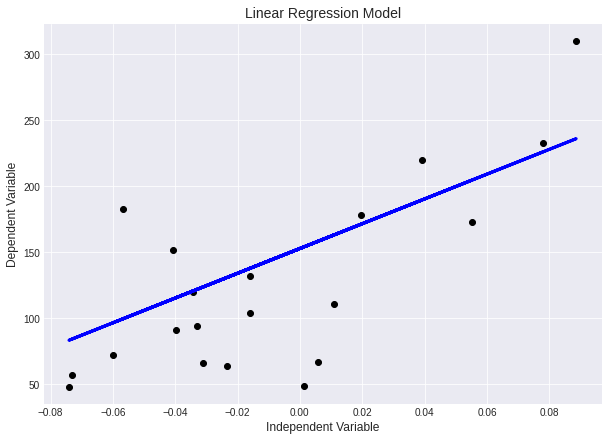

In [16]:
# Calculate variance score
print('Variance score: %2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.figure(figsize=(10, 7))
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, regr.predict(
    diabetes_X_test), color='blue', linewidth=3)
plt.title('Linear Regression Model', fontsize=14)
plt.xlabel('Independent Variable', fontsize=12)
plt.ylabel('Dependent Variable', fontsize=12)
plt.show()

The above figure shows the regression line that the model has predicted. And the actual data points used to predict. The model's variance score is 0.4 only, which means the prediction is not too strong and the model under fits the points. The variance score of 1 represents perfect fitting.

#### Additional Reading
You can read this <a href="https://blog.quantinsti.com/gold-price-prediction-using-machine-learning-python/" target="_blank">article</a> to predict the Gold price using the linear regression model.

<br><br>